**All imports**

In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from IPython.display import Image, display
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter 
import csv
import random

**Functions are defined here to improve readability**

In [98]:
def remove_outliers(dataframe, key):
    q1 = np.quantile(dataframe[key], 0.25)
 
    # Vinden van de 3rd quartile
    q3 = np.quantile(dataframe[key], 0.75)
    
    # Vinden van de IQR
    iqr = q3-q1
    
    # Vinden van de upper en lower bound
    upper_bound = q3+(1.5*iqr)
    lower_bound = q1-(1.5*iqr)

    return dataframe[(dataframe[key] >= lower_bound) & (dataframe[key] <= upper_bound)]

def boxplot_gross(dataframe, key):
    fig1, ax1 = plt.subplots()
    ax1.boxplot(dataframe[key])
    def euro_formatter(x, _):
        if x >= 1000000:
            return f"${x / 1000000:.0f}M"
    plt.gca().yaxis.set_major_formatter(FuncFormatter(euro_formatter))
    ax1.set_title(f"Boxplot van het {key}")
    ax1.set_xlabel(key)
    ax1.set_ylabel('Omzet')
    plt.show()

def histogram_gross(dataframe, key):
    plt.hist(dataframe[key], bins=100, color='skyblue', edgecolor='black')
    def euro_formatter(x, _):
        if x >= 1000000:
            return f"${x / 1000000:.0f}M"
    plt.gca().xaxis.set_major_formatter(FuncFormatter(euro_formatter))
    plt.title(f"Aantal voorkomens van {key}")
    plt.xlabel('Omzet')
    plt.ylabel('Frequentie')
    plt.show()

def boxplot_likes(dataframe, key):
    fig1, ax1 = plt.subplots()
    ax1.boxplot(dataframe[key])
    ax1.set_title(f"Boxplot van het {key}")
    ax1.set_xlabel(key)
    ax1.set_ylabel('Aantal likes')
    plt.show()

def histogram_likes(dataframe, key):
    plt.hist(dataframe[key], bins=100, color='skyblue', edgecolor='black')
    plt.title(f"Aantal voorkomens van likes {key}")
    plt.xlabel('Likes')
    plt.ylabel('Frequentie')
    plt.show()

def correlation_plot(df, targetVariable, featureVariable):
    fig1, ax1 = plt.subplots()
    ax1.scatter(df[targetVariable], df[featureVariable], s=3)

    def euro_formatter(x, _):
        if x >= 1000000:
            return f"${x / 1000000:.0f}M"
    plt.gca().xaxis.set_major_formatter(FuncFormatter(euro_formatter))
    
    ax1.set_xlabel(targetVariable)
    ax1.set_ylabel(featureVariable)

    # r-waarde en p-waarde
    correlation = df[[targetVariable, featureVariable]].corr().iloc[0, 1]

    # toevoegen aan de titel
    ax1.set_title(f"{targetVariable} vs {featureVariable} (r = {correlation:.2f})")

**Load the dataset**

In [99]:
dfr = pd.read_csv('data/movie-1.csv')

# Show the maximum info the dataframe can give.
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

**Copy of the dataset**

Making a copy of the data to work with so we will not alter the actual dataset given.

In [100]:
df = dfr.copy()

**Taking a look at the data we're given**

In [101]:
df.head(5)

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,11700,Stephanie Sigman,1.0,bomb|espionage|sequel|spy|terrorist,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,106759,Joseph Gordon-Levitt,0.0,deception|imprisonment|lawlessness|police offi...,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,Doug Walker,Star Wars: Episode VII - The Force Awakens ...,8,143,NaN,0.0,NaN,http://www.imdb.com/title/tt5289954/?ref_=fn_t...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


**Get the column names to see with what kind of variables we're working with**

In [102]:
# for col in df.columns:
#     print(f"column: {col}, dtype: {df[col].dtype}")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   color                      5024 non-null   object 
 1   director_name              4939 non-null   object 
 2   num_critic_for_reviews     4993 non-null   float64
 3   duration                   5028 non-null   float64
 4   director_facebook_likes    4939 non-null   float64
 5   actor_3_facebook_likes     5020 non-null   float64
 6   actor_2_name               5030 non-null   object 
 7   actor_1_facebook_likes     5036 non-null   float64
 8   gross                      4159 non-null   float64
 9   genres                     5043 non-null   object 
 10  actor_1_name               5036 non-null   object 
 11  movie_title                5043 non-null   object 
 12  num_voted_users            5043 non-null   int64  
 13  cast_total_facebook_likes  5043 non-null   int64

**Measurement levels**

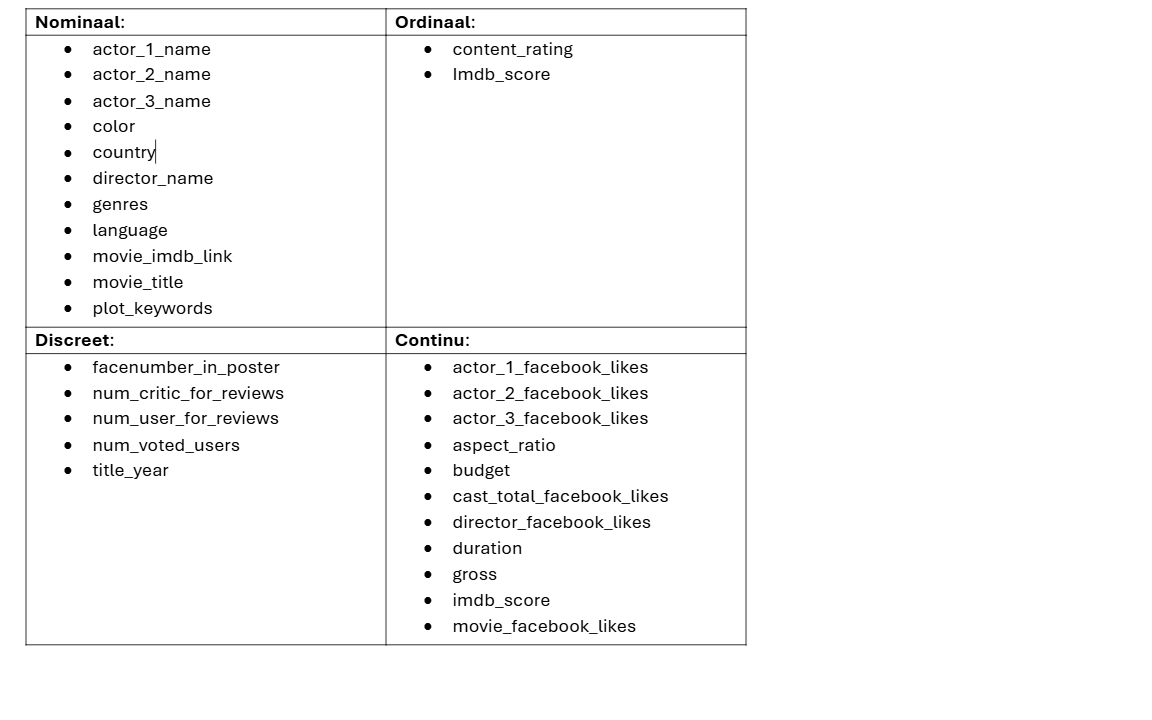

In [103]:
display(Image(filename="meet.png"))

**Target and Feature variables**

In [104]:
featureVariables = [ #'movie_title',
                    'director_name', 'director_facebook_likes',
                    'actor_1_name', 'actor_1_facebook_likes', 
                    'actor_2_name', 'actor_2_facebook_likes', 
                    'actor_3_name', 'actor_3_facebook_likes', 
                    'cast_total_facebook_likes',
                    'movie_facebook_likes',
                    'imdb_score']

targetVariable = ['gross']

numVariable =   ['director_facebook_likes', 
                'actor_1_facebook_likes', 
                'actor_2_facebook_likes', 
                'actor_3_facebook_likes', 
                'cast_total_facebook_likes', 
                'movie_facebook_likes', 
                'imdb_score',
                'gross']

**Make another DF with only the columns we're interested in.**

In [105]:
print(df.shape) #check impact
df = df[featureVariables + targetVariable]
print(df.shape) #check impact

(5043, 28)
(5043, 12)


In [106]:
df.head(1)

,director_name,director_facebook_likes,actor_1_name,actor_1_facebook_likes,actor_2_name,actor_2_facebook_likes,actor_3_name,actor_3_facebook_likes,cast_total_facebook_likes,movie_facebook_likes,imdb_score,gross
0,James Cameron,0.0,CCH Pounder,1000.0,Joel David Moore,936.0,Wes Studi,855.0,4834,33000,7.9,760505847.0


**Check NaN values**

Drop all the NaN values in all the feature and target variables. (for now) Later on we will do more research on how to properly handle these.

In [107]:
df.isna().sum()

director_name                104
director_facebook_likes      104
actor_1_name                   7
actor_1_facebook_likes         7
actor_2_name                  13
actor_2_facebook_likes        13
actor_3_name                  23
actor_3_facebook_likes        23
cast_total_facebook_likes      0
movie_facebook_likes           0
imdb_score                     0
gross                        884
dtype: int64

In [108]:
checkNan = df[df['gross'].isna()]
checkNan.head(5)

,director_name,director_facebook_likes,actor_1_name,actor_1_facebook_likes,actor_2_name,actor_2_facebook_likes,actor_3_name,actor_3_facebook_likes,cast_total_facebook_likes,movie_facebook_likes,imdb_score,gross
4,Doug Walker,131.0,Doug Walker,131.0,Rob Walker,12.0,NaN,NaN,143,0,7.1,NaN
84,Roland Joffé,596.0,Tamsin Egerton,622.0,Alice Englert,525.0,Bipasha Basu,283.0,1982,677,4.5,NaN
98,Hideaki Anno,28.0,Mark Chinnery,544.0,Shin'ya Tsukamoto,106.0,Atsuko Maeda,12.0,699,0,8.2,NaN
177,NaN,NaN,Don Johnson,982.0,Philip Michael Thomas,321.0,John Diehl,184.0,1687,0,7.5,NaN
199,Matt Birch,0.0,Rupert Grint,10000.0,Dave Legeno,570.0,Ralph Ineson,159.0,11036,40,7.5,NaN


We will drop all NaN values. We can not replace them because the vast majority contains our target variable.

In [109]:
print(df.shape) #check impact
df = df.dropna()
print(df.shape) #check impact

(5043, 12)
(4143, 12)


In [110]:
df.head(1)

,director_name,director_facebook_likes,actor_1_name,actor_1_facebook_likes,actor_2_name,actor_2_facebook_likes,actor_3_name,actor_3_facebook_likes,cast_total_facebook_likes,movie_facebook_likes,imdb_score,gross
0,James Cameron,0.0,CCH Pounder,1000.0,Joel David Moore,936.0,Wes Studi,855.0,4834,33000,7.9,760505847.0


In [111]:
print(df.shape) #check impact

(4143, 12)


**Now we will analyse all columns to check for anomalies.**

All the statistics look clean. 

All columns containing 'names' have NaN and number where this is expected. 

All columns containing 'likes' have NaN and a number where this is expected. Also no weird min or max values

The column 'imdb_score' has values only between 0 and 10 which is expected.

And lastly the column 'gross' has a natural order of magnitude from min to max.

In [112]:
df.describe(include="all")

,director_name,director_facebook_likes,actor_1_name,actor_1_facebook_likes,actor_2_name,actor_2_facebook_likes,actor_3_name,actor_3_facebook_likes,cast_total_facebook_likes,movie_facebook_likes,imdb_score,gross
count,4143,4143.000000,4143,4143.000000,4143,4143.000000,4143,4143.000000,4143.000000,4143.000000,4143.000000,4.143000e+03
unique,1870,NaN,1611,NaN,2433,NaN,2867,NaN,NaN,NaN,NaN,NaN
top,Steven Spielberg,NaN,Robert De Niro,NaN,Morgan Freeman,NaN,Steve Coogan,NaN,NaN,NaN,NaN,NaN
freq,25,NaN,42,NaN,20,NaN,8,NaN,NaN,NaN,NaN,NaN
mean,NaN,749.229061,NaN,7361.561912,NaN,1892.577842,NaN,724.280714,10920.207338,8757.626599,6.466618,4.862508e+07
std,NaN,2950.712339,NaN,15067.611396,NaN,4374.787480,NaN,1811.375566,18541.781539,20822.017356,1.050970,6.852864e+07
min,NaN,0.000000,NaN,0.000000,NaN,0.000000,NaN,0.000000,0.000000,0.000000,1.600000,1.620000e+02
25%,NaN,10.000000,NaN,702.000000,NaN,345.000000,NaN,173.000000,1755.500000,0.000000,5.900000,5.404758e+06
50%,NaN,57.000000,NaN,1000.000000,NaN,651.000000,NaN,416.000000,3715.000000,186.000000,6.600000,2.559263e+07
75%,NaN,218.500000,NaN,12000.000000,NaN,962.000000,NaN,676.000000,15601.500000,10000.000000,7.200000,6.242729e+07


Waarschijnlijk verwijderen we geen outliers, Dit is niet nodig omdat er sommige films zijn die nou eenmaal veel of weinig omzet hebben.

In [113]:
# # print(f"Count before removing outliers: {df.shape}")
# boxplot_gross(df, 'gross')
# histogram_gross(df, 'gross')
# # df = remove_outliers(df, 'gross')
# # print(f"Count after removing outliers: {df.shape}")
# # boxplot_gross(df, 'gross')
# # histogram_gross(df, 'gross')

# for feature in featureVariables:
#     if 'like' in feature:
#         # print(f"Count before removing outliers: {df.shape}")
#         boxplot_likes(df, feature)
#         histogram_likes(df, feature)
#         # df = remove_outliers(df, feature)
#         # print(f"Count after removing outliers: {df.shape}")
#         # boxplot_likes(df, feature)
#         # histogram_likes(df, feature)

**Calculate the numeric variables against the target variable so we can look which features are (somewhat) important to the target variable**

In [114]:
correlation = df[numVariable].corr()['gross'].sort_values(ascending=False)

print(correlation)

gross                        1.000000
movie_facebook_likes         0.377715
actor_3_facebook_likes       0.307898
actor_2_facebook_likes       0.262397
cast_total_facebook_likes    0.246547
imdb_score                   0.200515
actor_1_facebook_likes       0.153992
director_facebook_likes      0.144661
Name: gross, dtype: float64


In [115]:
# correlation_plot(df, 'gross', 'director_facebook_likes')
# correlation_plot(df, 'gross', 'actor_1_facebook_likes')
# correlation_plot(df, 'gross', 'actor_2_facebook_likes')
# correlation_plot(df, 'gross', 'actor_3_facebook_likes')
# correlation_plot(df, 'gross', 'cast_total_facebook_likes')
# correlation_plot(df, 'gross', 'movie_facebook_likes')
# correlation_plot(df, 'gross', 'imdb_score')

**Assign dummy values to all the names. This is needed to calculate our model.**

In [116]:
#We selecteren de kolommen die wel al uit integers bestaan
X_numeric = df[['director_facebook_likes', 
                'actor_1_facebook_likes', 
                'actor_2_facebook_likes', 
                'actor_3_facebook_likes', 
                'cast_total_facebook_likes', 'movie_facebook_likes'
                ]]

# X = pd.concat([X_numeric, X_dummies], axis = 1)
X = pd.concat([X_numeric],axis = 1 )
y = df[['gross']]


X.head(1)

,director_facebook_likes,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,cast_total_facebook_likes,movie_facebook_likes
0,0.0,1000.0,936.0,855.0,4834,33000


In [117]:
print(X.shape) #check impact

(4143, 6)


In [118]:
X.head(10)

,director_facebook_likes,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,cast_total_facebook_likes,movie_facebook_likes
0,0.0,1000.0,936.0,855.0,4834,33000
1,563.0,40000.0,5000.0,1000.0,48350,0
2,0.0,11000.0,393.0,161.0,11700,85000
3,22000.0,27000.0,23000.0,23000.0,106759,164000
5,475.0,640.0,632.0,530.0,1873,24000
6,0.0,24000.0,11000.0,4000.0,46055,0
7,15.0,799.0,553.0,284.0,2036,29000
8,0.0,26000.0,21000.0,19000.0,92000,118000
9,282.0,25000.0,11000.0,10000.0,58753,10000
10,0.0,15000.0,4000.0,2000.0,24450,197000


## Modellen ##

Hier gaan we de modellen toepassen op onze data. 

Als eerst gaan we de belangrijke imports hier defineren en alvast een train test split maken.

In [119]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=10)

Baseline.

Een baseline score is nodig om te kijken hoe ver onze modellen hiervan afwijken. Als de score eronder zit doet het model het beter dan de baseline model wat goed is, als de score erboven zit doet het model het slechter en is dit een reden om dat model niet te gaan gebruiken.

De baseline bereken je met de 'mean_squared_error' uitgedrukt in MSRE.

In [120]:
baseline = np.mean(y_train)

y_pred = np.ones(len(X_test)) * baseline

baseline_score = mean_squared_error(y_test, y_pred, squared=False)

print(f"RMSE: {baseline_score:.2f}")

RMSE: 69771005.94


Als eerst gaan we linieare regressie toepassen. 
De data gaan we ook normaliseren. Normaliseren is nodig om het linieare regressie model beter te laten werken omdat het model werkt op relatieve afstanden van elkaar.
Bij dit model hebben we niet gekozen voor hyperparameters, dit model is vrij simpel en geeft alleen een directe oplossing door de normale vergelijking.

De uitkomst van dit model zit met 14,94% onder het baseline model wat goed is. 
de R-squared is 0.28. Dit model kan ongeveer 28% van de variatie in de afhankelijke variabele kan verklaren. Dit is niet al te best. Dit duid op een niet linieare relatie. (dit hadden we ook gezien bij de correlatie plots)

In [121]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [122]:
import sklearn.linear_model as lm
from sklearn.metrics import r2_score

# Maak een lineaire regressie model aan
lr = lm.LinearRegression()

# Fit het model met de trainings data
lr.fit(X_train_scaled, y_train)

# Bereken de voorspellingen voor de test data
y_pred = lr.predict(X_test_scaled)

# Bereken de RMSE
lr_score = mean_squared_error(y_test, y_pred, squared=False)
print(f"Root Mean Squared Error: {lr_score:.2f}") 

# Bereken de R^2 score voor het regressiemodel
r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2:.2f}")

Root Mean Squared Error: 59350548.75
R-squared: 0.28


Hier gaan we KNN toepassen. De hyperparameters zijn n_neighbors=6, weights="distance", p=2
We hebben gekozen voor N_neighbors=6 want hier zit de 'knik'. Dit betekent dat dit het 'beste' model is zonder te overfitten.
Ook hebben we gekozen voor p=2. Dit neemt de euclidische afstand ipv p=1 de minkowski afstand. Dit geeft voor onze dataset het beste resultaat.

De uitkomst van dit model is 60712818.89, wat met 12,98% boven het baseline model zit wat goed is.

In [132]:
from sklearn.neighbors import KNeighborsRegressor

# KNN regressie model met hyperparameters
knn = KNeighborsRegressor(n_neighbors=6, weights="distance", p=2)

# Fitten met trainingsdaata
knn.fit(X_train_scaled, y_train)

# Bereken de voorspellingen
y_pred = knn.predict(X_test_scaled)

# Bereken de RMSE
knn_score = mean_squared_error(y_test, y_pred, squared=False)
print(f"Root Mean Squared Error: {knn_score:.2f}")

Root Mean Squared Error: 60712818.89


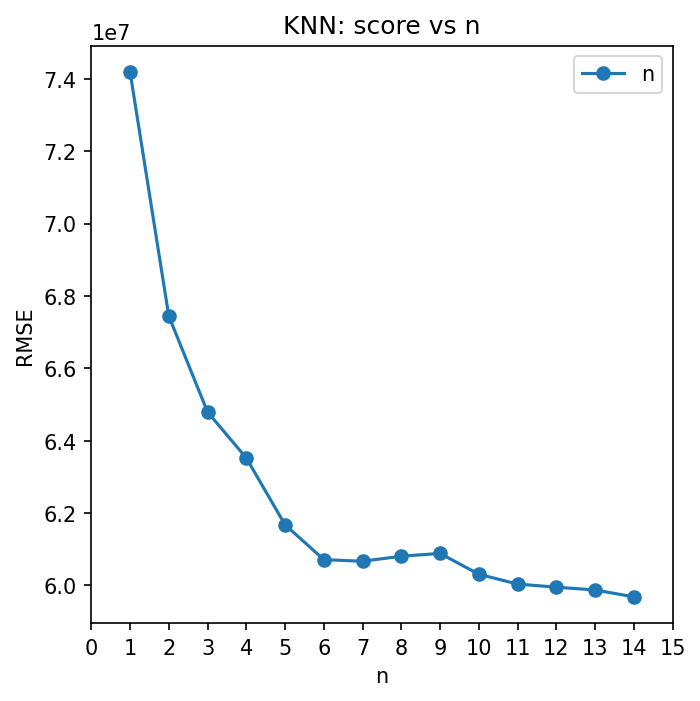

In [124]:
data = []

max_n = 15

for i in range(1, max_n):
    knn = KNeighborsRegressor(n_neighbors=i, weights="distance", p=2)

    # Fitten met trainingsdaata
    knn.fit(X_train_scaled, y_train)

    # Bereken de voorspellingen
    y_pred = knn.predict(X_test_scaled)

    # Bereken de RMSE
    knn_score = mean_squared_error(y_test, y_pred, squared=False)

    data.append([i, knn_score])

df = pd.DataFrame(data, columns=['n', 'RMSE'])

fig = plt.figure(figsize=(5,5), dpi=150)

# object axes: de grafiekbasis
ax = plt.axes()

ax.set(xlim=(0,max_n),
       xlabel='n',
       ylabel='RMSE',
       title='KNN: score vs n')

ax.xaxis.set_major_locator(plt.MaxNLocator(15))
ax.ticklabel_format(useOffset=False)
ax.plot(df['n'], df['RMSE'], '-o')

ax.legend(['n'])